# Decision Trees and Random Forests
In this kernel, we'll expand on the random forest analysis outlined in __[this](https://www.kaggle.com/learn/machine-learning)__ kaggle tutorial. 

In [1]:
# import modules
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

/anaconda2/envs/kaggle27/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# load data
iowa_file_path = '../data/raw/train.csv'
home_data = pd.read_csv(iowa_file_path)

In [3]:
# divide data into features and target variable
y = home_data.SalePrice

# we are using only the following features in this analysis

features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

X = home_data[features]

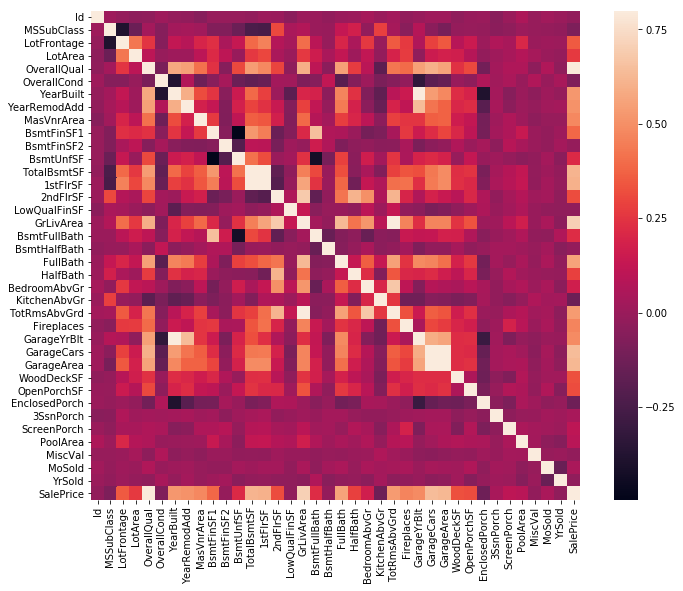

In [4]:
#correlation matrix
corrmat = home_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

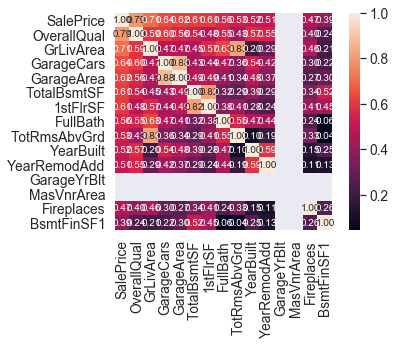

In [40]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(home_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [42]:
# fit the random forest classifier using the top 10 most correlated variables
# note we have to remove redundant variables (lets say correlation over 0.8) 
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'MasVnrArea']
X = home_data[features]

In [43]:
# note: there are no missing values in this subset of the training data
print(X.isnull().sum().max())

8


In [20]:
# further divide the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [21]:
# define our decision tree regressor model
iowa_model = DecisionTreeRegressor(random_state=1)

# fit this model to our training data
iowa_model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [22]:
# predict model with infinite leaf nodes
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 26,435


In [23]:
# plot MAE as a function of leaf nodes to determine best bias-variance tradeoff
leaf_nodes = pd.Series(range(2,500))

def find_mae(train_X, train_y, val_X, val_y, nodes):
    iowa_model = DecisionTreeRegressor(random_state=1, max_leaf_nodes=nodes)
    iowa_model.fit(train_X, train_y)
    val_predictions = iowa_model.predict(val_X)
    val_mae = mean_absolute_error(val_predictions, val_y)
    return val_mae

mae_plot = []

for i in leaf_nodes:
    mae_plot.append(find_mae(train_X, train_y, val_X, val_y,i))

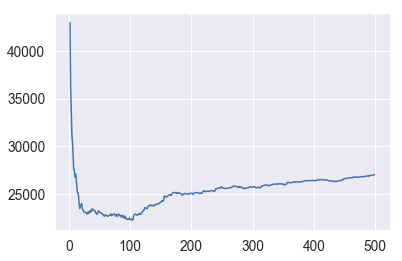

In [24]:
plt.plot(leaf_nodes,mae_plot)

In [25]:
# find the minimum index
mindex = np.argmin(mae_plot)
print(leaf_nodes[mindex])
print("Best value of max_leaf_nodes is: {:,.0f}".format(leaf_nodes[mindex]))

104
Best value of max_leaf_nodes is: 104


In [26]:
# Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=71, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE for best value of max_leaf_nodes: 22,776


In [27]:
# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# fit your model
rf_model.fit(train_X,train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(val_predictions, val_y)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 20630.3228963


In [32]:
test[features].fillna(0)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,5,896,1.0,882.0,1,1961
1,6,1329,1.0,1329.0,1,1958
2,5,1629,2.0,928.0,2,1997
3,6,1604,2.0,926.0,2,1998
4,8,1280,2.0,1280.0,2,1992
5,6,1655,2.0,763.0,2,1993
6,6,1187,2.0,1168.0,2,1992
7,6,1465,2.0,789.0,2,1998
8,7,1341,2.0,1300.0,1,1990
9,4,882,2.0,882.0,1,1970


In [34]:
# Read the test data
test = pd.read_csv('../data/raw/test.csv')
# Treat the test data in the same way as training data. In this case, pull same columns.
test_X = test[features].fillna(0)
# Use the model to make predictions
predicted_prices = rf_model.predict(test_X)
# We will look at the predicted prices to ensure we have something sensible.
print(predicted_prices)

[113760.  146025.  156596.4 ... 143670.  120555.  213250. ]


In [38]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('../submission.csv', index=False)